In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#Download the dataset

In [87]:
df= pd.read_csv('train.csv')

In [88]:
#display the first 5 rows

In [89]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [90]:
#check the basic info

In [91]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [92]:
#Describe

In [93]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [94]:
#Check the missing values 

In [95]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [96]:
#Drop Cabin(has too many missing values)

In [97]:
df.drop('Cabin', axis=1, inplace=True)


In [98]:
#1.What was the overall survival Rate?

In [99]:
survival_rate = df['Survived'].mean()*100
print(f"Survival Rate:{survival_rate:.2f}%")

Survival Rate:38.38%


In [100]:
#Visualization

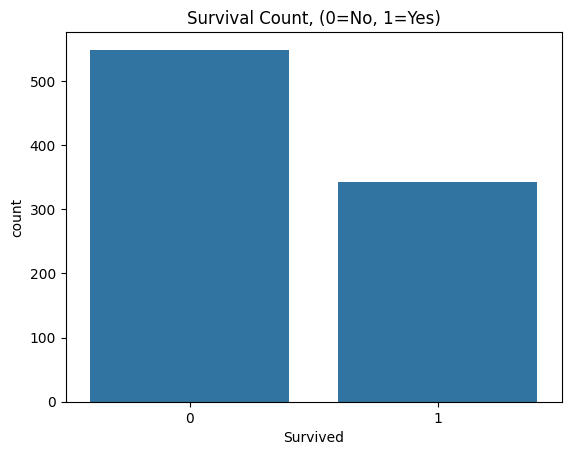

In [101]:
sns.countplot(x='Survived',data=df)
plt.title('Survival Count, (0=No, 1=Yes)')
plt.show()

In [102]:
#2.Did gender effect survival?

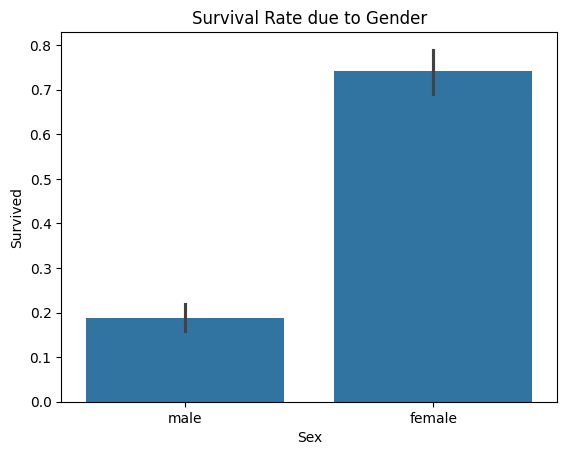

In [103]:
sns.barplot(x="Sex", y ="Survived",data=df)
plt.title("Survival Rate due to Gender")
plt.show()

In [104]:
#3.Did Passenger Class(Pclass) influenced Survival?

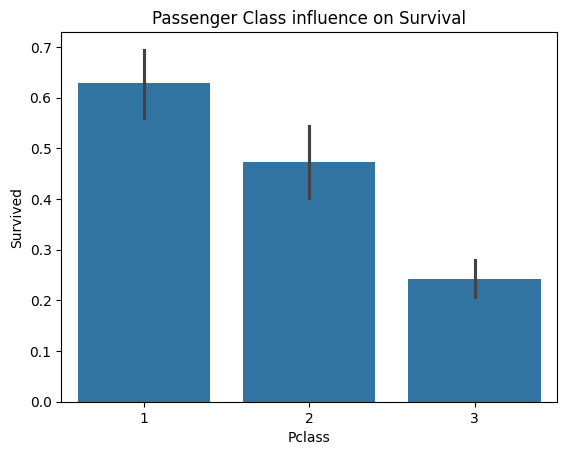

In [105]:
sns.barplot(x='Pclass',y ='Survived',data=df)
plt.title('Passenger Class influence on Survival')
plt.show()

In [106]:
#Q4: What was the age distribution of survivors vs. non-survivors?

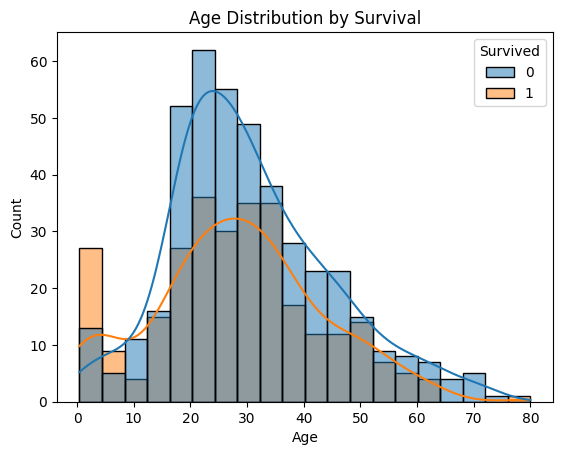

In [107]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=20)
plt.title('Age Distribution by Survival')
plt.show()

In [108]:
#the above graph states that most passengers were in the age of 20-40.
#More number of young children survived from the age group of 0-10 due to the priority given.
#There are more number of deaths than survivors as indicated by large number of blue bars.
#The Survival Rate seems to be higher among the young passengers as compared to the old ones.

In [109]:
#Q5: How do fare and survival relate?

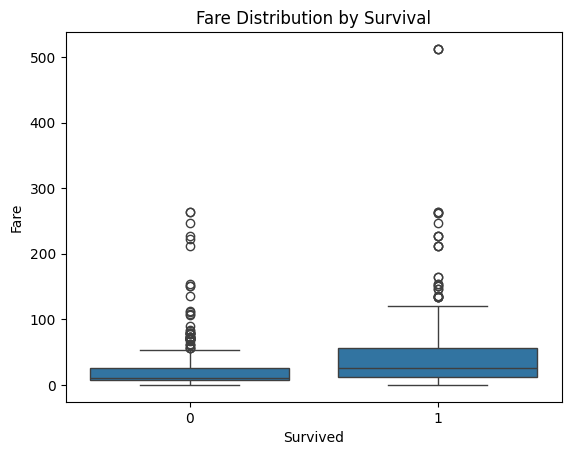

In [110]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

In [111]:
#Passengers who paid higher fares had a better chance of survival because they were in the first class cabins 
#and had better access to life boats.
#Whereas the non-survivors paid less fares were in low class cabins and has bad access to life boats.

In [120]:
#6.How family presence influenced survival chances?

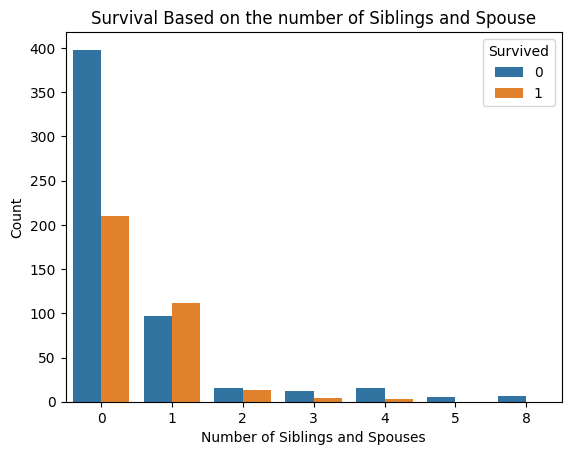

In [119]:
sns.countplot(x='SibSp', hue='Survived',data=df)
plt.title("Survival Based on the number of Siblings and Spouse")
plt.xlabel('Number of Siblings and Spouses')
plt.ylabel('Count')
plt.show()

In [121]:
#Solo travellers had lower survival rates
#Travelling with atleast one family member improved the Survival Chances 
#Larger families had lower Survival Rate 

In [131]:
#7.A correlation chart that helps in identifying key survival factors and supports previous analysis
#with statistical evidence.

In [127]:
# Drop non-numeric columns that aren't needed
df.drop(['Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

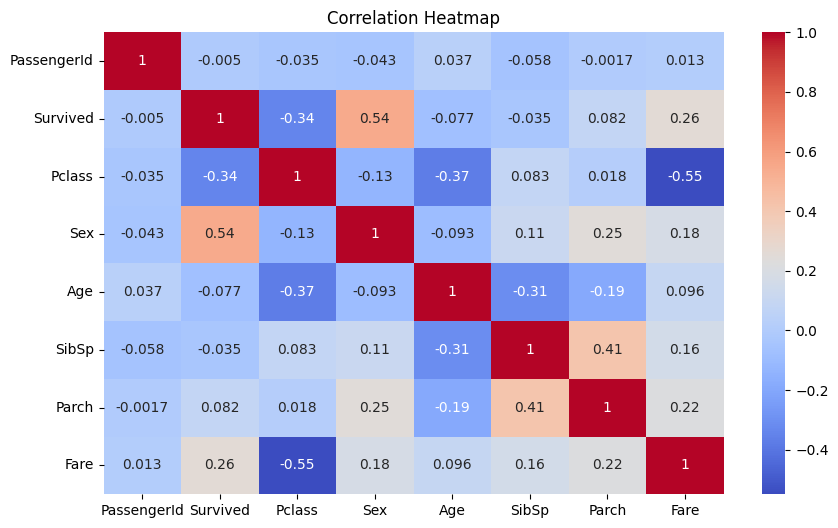

In [ ]:

# Convert categorical variables to numeric
df_numeric = df.copy()
df_numeric['Sex'] = df_numeric['Sex'].map({'male': 0, 'female': 1})
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [130]:
#FINAL CONCLUSION
#Higher-class Passengers and those who paid higher fares had a higher survival rate 
#Age had a minor effect, with younger passengers slightly more likely to survive.
#Passengers with family had some Correlation with survival but not as strong as fare and class